# Dificultades en el Método de Eliminación de Gauss Simple

El método de eliminación de Gauss simple, aunque útil para resolver muchos sistemas de ecuaciones lineales, presenta algunas dificultades que deben ser consideradas al implementarlo, especialmente en programas de cómputo generales. A continuación, se detallan las principales dificultades:

## 1. División entre cero

### Problema:
Durante las fases de eliminación y sustitución hacia atrás, puede ocurrir una división entre cero o un número muy cercano a cero.

### Ejemplo:
En el sistema:
```
0x₁ + 2x₂ + 3x₃ = 8
4x₁ + 6x₂ + 7x₃ = -3
2x₁ + x₂ + 6x₃ = 5
```
La normalización del primer renglón implicaría una división por cero (a₁₁ = 0).

### Solución:
La técnica de pivoteo se ha desarrollado para evitar parcialmente estos problemas.

#### Ejemplo:

Consideremos el sistema del ejemplo dado:

```
0x₁ + 2x₂ + 3x₃ = 8
4x₁ + 6x₂ + 7x₃ = -3
2x₁ + x₂ + 6x₃ = 5
```

Con pivoteo:

1. Se examina la primera columna: el mayor valor absoluto es 4.
2. Se intercambia la primera fila con la segunda:

```
4x₁ + 6x₂ + 7x₃ = -3
0x₁ + 2x₂ + 3x₃ = 8
2x₁ + x₂ + 6x₃ = 5
```

3. Ahora se puede proceder con la eliminación sin riesgo de división por cero.


## 2. Errores de redondeo

### Problema:
Debido a que las computadoras manejan un número limitado de cifras significativas, pueden ocurrir errores de redondeo que se propagan y amplifican en sistemas grandes.

### Ejemplo:

![](./img/ejem9_5.png)

![](./img/ejem_9_5B.png)


### Consideraciones:
- Los errores de redondeo son especialmente problemáticos en sistemas grandes (≥100 ecuaciones).
- Siempre se deben sustituir los resultados en las ecuaciones originales para verificar errores sustanciales.

## 3. Sistemas mal condicionados

### Problema:
En sistemas mal condicionados, pequeños cambios en los coeficientes pueden generar grandes cambios en la solución.

### Ejemplo:
Sistema original:
```
x₁ + 2x₂ = 10
1.1x₁ + 2x₂ = 10.4
```
Solución: x₁ = 4, x₂ = 3

Sistema modificado (cambio ligero en a₂₁):
```
x₁ + 2x₂ = 10
1.05x₁ + 2x₂ = 10.4
```
Solución: x₁ = 8, x₂ = 1

### Características:
- **a) El determinante del sistema es cercano a cero.**

In [12]:
import numpy as np

# Definir la matriz de coeficientes
A = np.array([[1, 2],
              [1.1, 2]])

B = np.array([[1, 2],
              [1.05, 2]])

# Calcular el determinante
print(f'A:{np.linalg.det(A)}\n')
print(f'B:{np.linalg.det(B)}')

A:-0.2000000000000001

B:-0.10000000000000012


- **b) Gráficamente, las líneas que representan las ecuaciones tienen pendientes muy similares.**

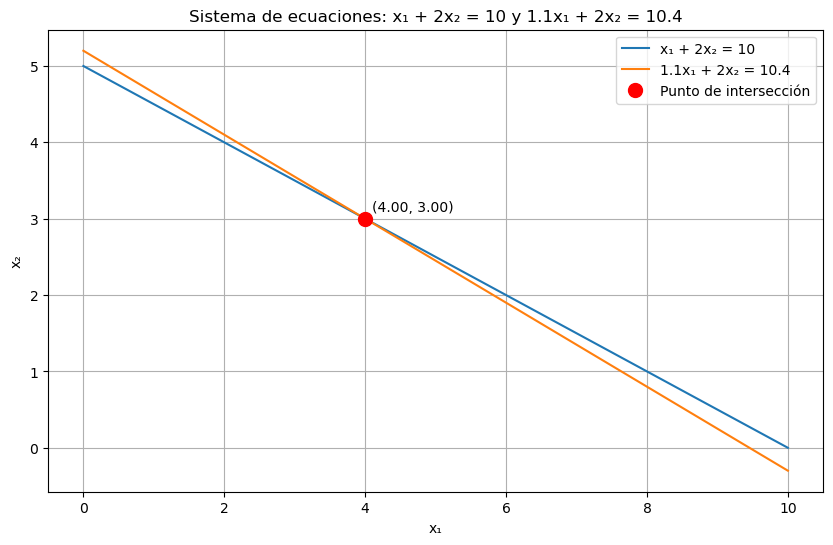

In [11]:
import matplotlib.pyplot as plt

# Definir las funciones para las ecuaciones
def eq1(x):
    return (10 - x) / 2

def eq2(x):
    return (10.4 - 1.1*x) / 2

# Crear un rango de valores para x
x = np.linspace(0, 10, 100)

# Calcular los valores correspondientes de y para cada ecuación
y1 = eq1(x)
y2 = eq2(x)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='x₁ + 2x₂ = 10')
plt.plot(x, y2, label='1.1x₁ + 2x₂ = 10.4')
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title('Sistema de ecuaciones: x₁ + 2x₂ = 10 y 1.1x₁ + 2x₂ = 10.4')
plt.legend()
plt.grid(True)

# Encontrar el punto de intersección
x_interseccion = (10.4 - 10) / 0.1
y_interseccion = eq1(x_interseccion)

# Marcar el punto de intersección
plt.plot(x_interseccion, y_interseccion, 'ro', markersize=10, label='Punto de intersección')
plt.annotate(f'({x_interseccion:.2f}, {y_interseccion:.2f})', 
             (x_interseccion, y_interseccion), 
             xytext=(5, 5), 
             textcoords='offset points')

plt.legend()
plt.show()

 - **c) La sustitución de los resultados en las ecuaciones originales puede no revelar el problema.**

### Evaluación:
- Escalar las ecuaciones para que el elemento máximo en cada renglón sea 1 puede ayudar a evaluar la condición del sistema.
- Modificar ligeramente los coeficientes y resolver de nuevo puede revelar si el sistema está mal condicionado.

## 4. Sistemas singulares

### Problema:
Ocurre cuando dos o más ecuaciones son idénticas o linealmente dependientes.

### Características:
- El determinante del sistema es exactamente cero.
- Se pierde un grado de libertad, resultando en n-1 ecuaciones con n incógnitas.

### Detección:
- Durante la eliminación gaussiana, si se crea un cero en la diagonal, el sistema es singular.
- El cálculo puede terminarse inmediatamente si se detecta esta condición.

## Conclusión

Aunque estas dificultades existen, la mayoría de las ecuaciones algebraicas lineales obtenidas de problemas de ingeniería son naturalmente bien condicionadas. Además, técnicas como el pivoteo y el escalamiento pueden ayudar a mitigar algunos de estos problemas. Es crucial estar consciente de estas dificultades al implementar y utilizar el método de eliminación de Gauss simple, especialmente en sistemas grandes o en aplicaciones críticas.

In [13]:
import numpy as np
from tabulate import tabulate

def print_matrix(matrix, precision=4):
    """
    Imprime una matriz en formato algebraico usando tabulate.
    
    :param matrix: Una matriz NumPy o una lista de listas.
    :param precision: Número de decimales a mostrar (por defecto 4).
    """
    if isinstance(matrix, list):
        matrix = np.array(matrix)
    
    # Formatear cada elemento de la matriz
    formatted_matrix = [[f"{x:.{precision}f}" for x in row] for row in matrix]
    
    # Imprimir la matriz usando tabulate
    print(tabulate(formatted_matrix, tablefmt="fancy_grid", stralign="center"))

In [14]:
import numpy as np

def gauss_elimination(A, b):
    n = len(b)
    # Crear una matriz aumentada
    Ab = np.column_stack((A, b))

    for i in range(n):
        # Pivoteo parcial
        max_element = abs(Ab[i:, i]).argmax() + i  # .argmax(): Encuentra el índice del valor 
                                                   #            máximo en el array resultante.
        if i != max_element:
            Ab[i], Ab[max_element] = Ab[max_element], Ab[i].copy()

        # Hacer el elemento diagonal igual a 1
        Ab[i] = Ab[i] / Ab[i, i]

        # Hacer ceros debajo del elemento diagonal
        for j in range(i + 1, n):
            Ab[j] -= Ab[j, i] * Ab[i]

    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = Ab[i, -1] - np.dot(Ab[i, i+1:n], x[i+1:])

    return x

In [3]:
# Ejemplo 1: División por cero
print("Ejemplo 1: División por cero")
A1 = np.array([[0, 2, 3], [4, 6, 7], [2, 1, 6]], dtype=float)
b1 = np.array([8, -3, 5], dtype=float)

try:
    x1 = gauss_elimination(A1, b1)
    print("Solución:", x1)
except Exception as e:
    print("Error:", str(e))
    
# Ejemplo 1: División por cero
print("Ejemplo 1: División por cero")
A1 = np.array([[4, 6, 7], [0, 2, 3],  [2, 1, 6]], dtype=float)
b1 = np.array([8, -3, 5], dtype=float)

try:
    x1 = gauss_elimination(A1, b1)
    print("Solución:", x1)
except Exception as e:
    print("Error:", str(e))

    # Ejemplo 1: División por cero
print("Ejemplo 1: División por cero")
A1 = np.array([[4, 6, 7],   [2, 1, 6], [0, 2, 3]], dtype=float)
b1 = np.array([8, -3, 5], dtype=float)

try:
    x1 = gauss_elimination(A1, b1)
    print("Solución:", x1)
except Exception as e:
    print("Error:", str(e))
    
A1

Ejemplo 1: División por cero
Solución: [-5.43181818  0.04545455  2.63636364]
Ejemplo 1: División por cero
Solución: [ 4.06818182 -0.95454545 -0.36363636]
Ejemplo 1: División por cero
Solución: [-1.93181818  3.04545455 -0.36363636]


array([[4., 6., 7.],
       [2., 1., 6.],
       [0., 2., 3.]])

In [11]:
# Ejemplo 2: Errores de redondeo
print("\nEjemplo 2: Errores de redondeo")
A2 = np.array([[1, 1, 1], [1, 1, 1.0001], [1, 1.0001, 1]], dtype=float)
b2 = np.array([3, 3.0001, 3.0001], dtype=float)
x2 = gauss_elimination(A2, b2)
print("Solución:", x2)
print("Error relativo:", np.linalg.norm(np.dot(A2, x2) - b2) / np.linalg.norm(b2))



Ejemplo 2: Errores de redondeo
Solución: [1. 1. 1.]
Error relativo: 0.0


In [18]:
# Ejemplo 3: Sistema mal condicionado
print("\nEjemplo 3: Sistema mal condicionado")
A3 = np.array([[1, 2], [1.1, 2]], dtype=float)
b3 = np.array([10, 10.4], dtype=float)

x3 = gauss_elimination(A3, b3)
print("Solución:", x3)


Ejemplo 3: Sistema mal condicionado
Solución: [4. 3.]


In [19]:
# Pequeña modificación
A3_mod = np.array([[1, 2], [1.05, 2]], dtype=float)
x3_mod = gauss_elimination(A3_mod, b3)
print("Solución con pequeña modificación:", x3_mod)

Solución con pequeña modificación: [8. 1.]


In [20]:
# Ejemplo 4: Detección de sistema singular
print("\nEjemplo 4: Detección de sistema singular")
A4 = np.array([[1, 2, 3], [2, 4, 6], [1, 2, 3]], dtype=float)
b4 = np.array([6, 12, 6], dtype=float)

def is_singular(A):
    return np.linalg.det(A) == 0

if is_singular(A4):
    print("El sistema es singular")
else:
    try:
        x4 = gauss_elimination(A4, b4)
        print("Solución:", x4)
    except Exception as e:
        print("Error:", str(e))

# Función para escalar una matriz
def scale_matrix(A):
    return A / np.max(np.abs(A), axis=1, keepdims=True)

# Ejemplo de escalamiento
print("\nEjemplo de escalamiento:")
A_scaled = scale_matrix(A3)
print("Matriz original:")
print(A3)
print("Matriz escalada:")
print(A_scaled)



Ejemplo 4: Detección de sistema singular
El sistema es singular

Ejemplo de escalamiento:
Matriz original:
[[1.  2. ]
 [1.1 2. ]]
Matriz escalada:
[[0.5  1.  ]
 [0.55 1.  ]]


In [21]:
# Ejemplo de escalamiento
print("\nEjemplo de escalamiento:")
A_scaled = scale_matrix(A3)
print("Matriz original:")
print(A3)
print("Matriz escalada:")
print(A_scaled)


Ejemplo de escalamiento:
Matriz original:
[[1.  2. ]
 [1.1 2. ]]
Matriz escalada:
[[0.5  1.  ]
 [0.55 1.  ]]
